### Waffle Chart

A `waffle chart` is an interesting visualization that is normally created to display progress toward goals. It is commonly an effective option when you are trying to add interesting visualization features to a visual that consists mainly of cells, such as an Excel dashboard.

In [1]:
%%capture
!pip3 install xlrd
!pip3 install pywaffle

In [2]:
from pywaffle import Waffle
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
df_can = pd.read_excel(
    'data/canada.xlsx',
    sheet_name='Canada by Citizenship',
    skiprows=range(20),
    skipfooter=2
)

In [4]:
df_can.columns = list(map(lambda x: str(x), df_can.columns))

In [5]:
drops = [
    'AREA', 
    'REG', 
    'DEV', 
    'Type', 
    'Coverage'
]
df_can.drop(columns=drops, inplace=True)

In [6]:
columns = {
    'OdName': 'Country',
    'AreaName': 'Continent',
    'RegName': 'Region'
}

df_can.rename(columns=columns, inplace=True)

In [7]:
df_can.set_index('Country', inplace=True)

In [8]:
df_can['Total'] = df_can.sum(axis=1)

In [9]:
df_dsn = df_can.loc[['Denmark', 'Norway', 'Sweden'], 'Total'].reset_index()

In [10]:
totals = dict(zip(df_dsn.Country, df_dsn.Total / 100))

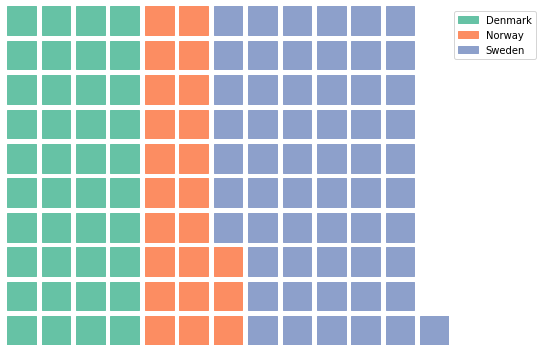

In [11]:
fig = plt.figure(
    FigureClass=Waffle,
    rows=10,
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1)},
    values=totals,
    figsize=(9, 5)
)
plt.show()

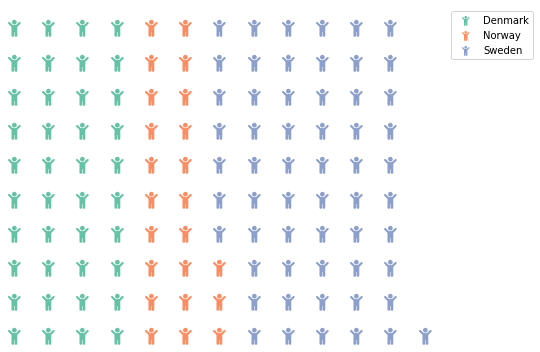

In [12]:
fig = plt.figure(
    FigureClass=Waffle,
    rows=10,
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1)},
    values=totals,
    icons='child',
    icon_legend=True,
    figsize=(9, 5)
)
plt.show()

In the charts as above, 1 block = 100 individuals.